# Pandas

- Bibliothèque de manipulation de tableau (*dataframe*).
- Très performance pour l'analyse de données.

## Chargement du module

In [2]:
import pandas as pd

## Créer des données

In [4]:
import numpy as np

In [5]:
df = pd.DataFrame(columns=["a", "b", "c", "d"],
                  index=["chat", "singe", "souris"],
                  data=[np.arange(10, 14),
                        np.arange(20, 24),
                        np.arange(30, 34)])

In [6]:
df

,a,b,c,d
chat,10,11,12,13
singe,20,21,22,23
souris,30,31,32,33


In [7]:
data = {"a": np.arange(10, 40, 10),
        "b": np.arange(11, 40, 10),
        "c": np.arange(12, 40, 10),
        "d": np.arange(13, 40, 10)}
df = pd.DataFrame.from_dict(data)
df.index = ["chat", "singe", "souris"]
df

,a,b,c,d
chat,10,11,12,13
singe,20,21,22,23
souris,30,31,32,33


## Charger d'un jeu de données existant

In [9]:
!wget https://python.sdv.univ-paris-diderot.fr/data-files/people.tsv

--2021-03-22 15:36:02--  https://python.sdv.univ-paris-diderot.fr/data-files/people.tsv
Résolution de python.sdv.univ-paris-diderot.fr (python.sdv.univ-paris-diderot.fr)… 194.254.61.54, 2001:660:3301:8003::54
Connexion à python.sdv.univ-paris-diderot.fr (python.sdv.univ-paris-diderot.fr)|194.254.61.54|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 253 [text/tab-separated-values]
Enregistre : «people.tsv.1»

people.tsv.1        100%[===================>]     253  --.-KB/s    ds 0s      

2021-03-22 15:36:02 (16,2 MB/s) - «people.tsv.1» enregistré [253/253]



In [12]:
people = pd.read_csv("people.tsv", sep="\t")

In [13]:
people

,name,sex,size,age
0,simon,male,175,33
1,clara,female,167,45
2,serge,male,181,44
3,claire,female,174,31
4,patrick,male,172,52
5,julie,female,168,37
6,paul,male,185,29
7,jeanne,female,172,56
8,baptiste,male,178,39
9,mathilde,female,168,46


In [22]:
people = pd.read_csv("people.tsv", sep="\t", index_col="name")

In [23]:
people

,sex,size,age
name,,,
simon,male,175,33
clara,female,167,45
serge,male,181,44
claire,female,174,31
patrick,male,172,52
julie,female,168,37
paul,male,185,29
jeanne,female,172,56
baptiste,male,178,39


### Exploration des données

In [24]:
people.head()

,sex,size,age
name,,,
simon,male,175,33
clara,female,167,45
serge,male,181,44
claire,female,174,31
patrick,male,172,52


In [25]:
people.tail()

,sex,size,age
name,,,
jeanne,female,172,56
baptiste,male,178,39
mathilde,female,168,46
bob,male,186,33
elise,female,159,63


In [26]:
people.shape

(12, 3)

In [27]:
people.dtypes

sex     object
size     int64
age      int64
dtype: object

In [28]:
people.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, simon to elise
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     12 non-null     object
 1   size    12 non-null     int64 
 2   age     12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6 KB


In [29]:
people.describe()

,size,age
count,12.000000,12.000000
mean,173.750000,42.333333
std,7.886986,10.662878
min,159.000000,29.000000
25%,168.000000,33.000000
50%,173.000000,41.500000
75%,178.750000,47.500000
max,186.000000,63.000000


### Analyse des données

Affichez la taille des participants

In [31]:
people["age"]

name
simon       33
clara       45
serge       44
claire      31
patrick     52
julie       37
paul        29
jeanne      56
baptiste    39
mathilde    46
bob         33
elise       63
Name: age, dtype: int64

Affichez toutes les infos sur Claire

In [32]:
people.loc["claire"]

sex     female
size       174
age         31
Name: claire, dtype: object

Déterminez la taille de Claire

In [34]:
people.loc["claire", "size"]

174

Déterminez l'âge de Baptiste.

In [35]:
people.loc["baptiste", "age"]

39

Affichez, en une seule commande, l'âge de Paul et Bob.

In [36]:
people.loc[["paul", "bob"], "age"]

name
paul    29
bob     33
Name: age, dtype: int64

Déterminez la moyenne et la valeur minimale de la taille et l'âge des individus.

In [38]:
people[["size", "age"]].min()

size    159
age      29
dtype: int64

In [39]:
people[["size", "age"]].mean()

size    173.750000
age      42.333333
dtype: float64

Comptez ensuite le nombre de personnes de chaque sexe.

In [41]:
people["sex"].value_counts()

female    6
male      6
Name: sex, dtype: int64

Déterminez, la taille et l'âge moyen chez les hommes et les femmes. Utilisez pour cela la méthode .groupby().

In [43]:
people.groupby("sex").mean()

,size,age
sex,,
female,168.0,46.333333
male,179.5,38.333333


Déterminez combien de d'individus mesurent plus de 1,80 m.

In [44]:
people[ people["size"]>180 ]

,sex,size,age
name,,,
serge,male,181,44
paul,male,185,29
bob,male,186,33


Quelle femme a moins de 35 ans ?

In [46]:
people[ (people["sex"]=="female") & (people["age"]<35) ]

,sex,size,age
name,,,
claire,female,174,31


Déterminez l'âge moyen des individus qui mesurent plus de 1,80 m.

In [50]:
people[ people["size"] > 180 ]["age"].mean()

35.333333333333336

Déterminez la taille maximale des femmes qui ont plus de 35 ans.

In [51]:
people[ people["sex"] == "female" ]["size"].max()

174

## Des graphiques

In [53]:
import matplotlib.pyplot as plt

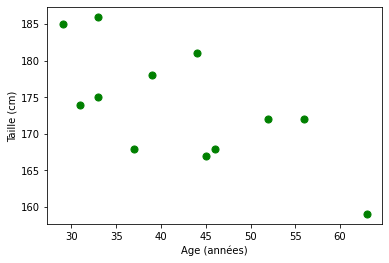

In [63]:
plt.scatter(people["age"], people["size"], color="green", marker="o", s=50)
plt.xlabel("Age (années)")
plt.ylabel("Taille (cm)");

In [74]:
people.groupby("sex").mean()

,size,age
sex,,
female,168.0,46.333333
male,179.5,38.333333


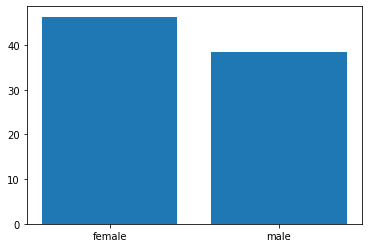

In [78]:
plt.bar(people.groupby("sex").mean().index, 
        people.groupby("sex").mean()["age"].values);

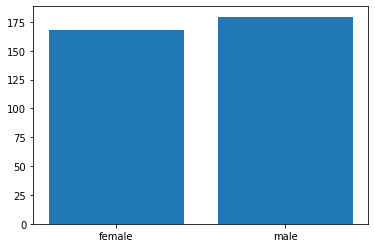

In [79]:
plt.bar(people.groupby("sex").mean().index, 
        people.groupby("sex").mean()["size"].values);